In [1]:
# June 2025
# Build a basic chatbot using LangGraph

In [2]:
from dotenv import load_dotenv
import os

# 1st method: using .env file.
load_dotenv()
# Access them using os.getenv or os.environ
api_key = os.getenv("GROQ_API_KEY")

# 2nd method: using hard code
# api_key = "<put the api key here>"
# if not os.environ.get("GROQ_API_KEY"):
#     os.environ["GROQ_API_KEY"] = api_key #getpass.getpass("Enter API key for Groq: ")



In [3]:



from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")

In [4]:
from typing import Annotated, Literal, List
from langgraph.graph import StateGraph, START, END

In [5]:
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
from pydantic import BaseModel, Field

In [6]:
from typing_extensions import TypedDict

In [7]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

    
graph_builder = StateGraph(State)    

In [8]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [9]:
# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, end_key="chatbot")
graph_builder.add_edge("chatbot", end_key=END)

In [10]:
graph = graph_builder.compile()

In [11]:
user_input = "hi, how is it going today?"

In [12]:
state = graph.invoke({
"messages":[{"role":"user", "content":user_input}]
})

In [13]:
state["messages"][-1].content

'Hi! I\'m just an AI, I don\'t have feelings or emotions like humans do, so I don\'t have good or bad days. I\'m always "on" and ready to help with any questions or tasks you may have! How about you, how\'s your day going?'

In [14]:
state

{'messages': [HumanMessage(content='hi, how is it going today?', additional_kwargs={}, response_metadata={}, id='69f894e8-5587-4bf7-9909-541731463750'),
  AIMessage(content='Hi! I\'m just an AI, I don\'t have feelings or emotions like humans do, so I don\'t have good or bad days. I\'m always "on" and ready to help with any questions or tasks you may have! How about you, how\'s your day going?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 18, 'total_tokens': 77, 'completion_time': 0.102870416, 'prompt_time': 0.008739067, 'queue_time': 0.333900863, 'total_time': 0.111609483}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_24ec19897b', 'finish_reason': 'stop', 'logprobs': None}, id='run--f030cc09-e037-4178-bf2f-51505f22bacb-0', usage_metadata={'input_tokens': 18, 'output_tokens': 59, 'total_tokens': 77})]}

## Visualize the graph

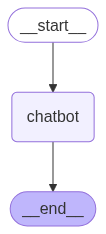

In [15]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Run the chatbot

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

In [ ]:
# The one has no memory on it. In the next notebooks, I will start using 
# memories for keeping the chats in the states.

In [ ]:
State

In [ ]:
# Resources:
# https://langchain-ai.github.io/langgraph/tutorials/get-started/1-build-basic-chatbot/
# https://www.youtube.com/watch?v=1w5cCXlh7JQ